# Data Wrangling and Cleaning
This notebook investigates the raw and partially processed datasets. 

# Orders Dataset

## Cleaning

Cleaning steps are refactored into "belly_rubb_analysis/dataset.py". These include:
    - Enforcing correct datatypes found in "docs/datatypes/".
    - Dropping columns with more than 70% missing values.
    - Dropping duplicate rows.
    - Dropping columns with a constant value.

In [1]:
import os
import pandas as pd

# Data Visualization
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno as msno

# Configuration info
%load_ext autoreload
%autoreload 1
%aimport belly_rubb_analysis.config
from belly_rubb_analysis.config import INTERIM_DATA_DIR, RAW_DATA_DIR, PROFILE_REPORTS_DIR

2024-12-19 15:21:36.485 | INFO     | belly_rubb_analysis.config:<module>:11 - PROJ_ROOT path is: /home/arsen/Documents/dsc_projects/belly_rubb_analysis


In [2]:
orders_df = pd.read_csv(RAW_DATA_DIR / 'orders.csv')

orders_processed_df = pd.read_csv(INTERIM_DATA_DIR / 'orders_processed.csv')

In [3]:
# Generate initial report of orders.csv

if not os.path.exists(PROFILE_REPORTS_DIR / 'orders-profile-report.html'):
    profile = ProfileReport(orders_df, title='Orders Profiling Report')
    profile.to_file('./../reports/profile-reports/orders-profile-report.html')

In [4]:
orders_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order                     1398 non-null   object 
 1   Order Date                1399 non-null   object 
 2   Order Subtotal            1399 non-null   float64
 3   Order Tax Total           1399 non-null   float64
 4   Order Total               1399 non-null   float64
 5   Fulfillment Date          1399 non-null   object 
 6   Fulfillment Type          1399 non-null   object 
 7   Channels                  1399 non-null   object 
 8   Recipient Name            1399 non-null   object 
 9   Recipient Email           1065 non-null   object 
 10  Recipient Phone           1399 non-null   object 
 11  Item Quantity             1399 non-null   int64  
 12  Item Name                 1398 non-null   object 
 13  Item Variation            1398 non-null   object 
 14  Item Mod

## Missing Values

Although columns with more than 70% missing values were dropped, there are a few left with considerable missingness. These include:

    - `Recipient Email`: 23.8% missing
    - `Order`: 0.1% missing
    - `Item Name`: 0.1% missing
    - `Item Variation`: 0.1% missing
    - `Item Modifiers`: 40.5% missing

These will be investigated for any patterns.

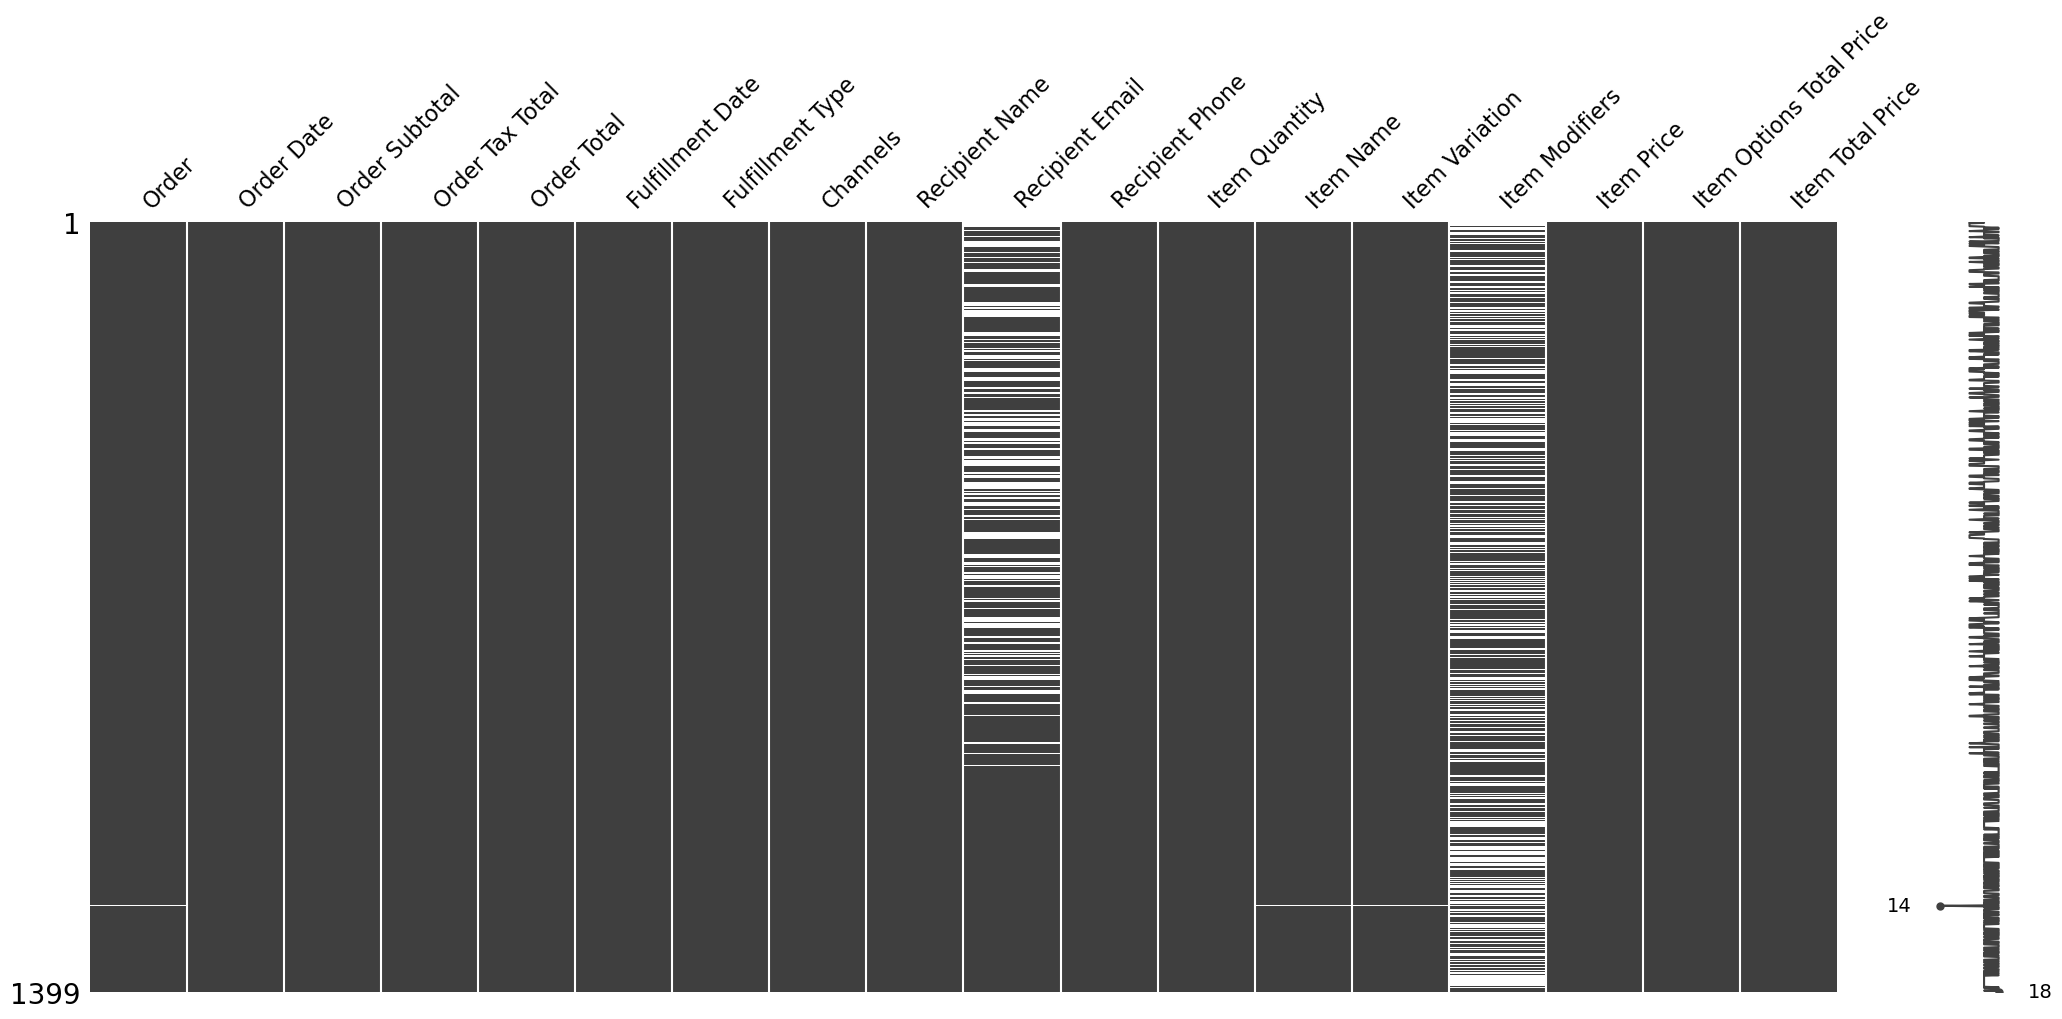

In [ ]:
# Visualize missingness matrix

msno.matrix(orders_processed_df)

plt.show()

### Item Modifiers

In [6]:
orders_processed_df['Item Modifiers'].unique()

array([nan, '1 x Signature BBQ Sauce Drizzle, 1 x Salt and Pepper',
       '1 x Lemon Pepper',
       '1 x Sprite ™, 1 x Mac & Cheese, 1 x Rosemary Pepper Fries, 1 x Sweet&Spicy Glaze, 1 x Boom-Boom Sauce DIp',
       '1 x Boom-Boom Sauce DIp, 1 x Sweet and Spicy BBQ Sauce Dip',
       '1 x Sweet and Spicy BBQ Sauce Dip, 1 x Pickled Jalapeño Peppers',
       '1 x Signature BBQ Glaze, 1 x Signature BBQ Sauce Dip',
       '1 x Rosemary Pepper',
       '1 x Salt&Pepper, 1 x Sweet&Spicy glaze (Pairs well w/ LemonPeeper seasoning), 1 x Lemon Pepper, 1 x Signature BBQ Glaze, 1 x Sweet & Spicy BBQ Glaze',
       '1 x Chunky Blue Cheese Dip, 1 x Sweet&Spicy Glaze',
       '1 x No glaze, 1 x Salt&Pepper, 1 x Boom-Boom Sauce DIp, 1 x Classy Ranch Dip',
       '1 x Garlic Parmesan, 1 x Diet Coke ™',
       '1 x Yes, please! Add some bacon., 1 x Add gorgonzola! Make it special.',
       '1 x Please, cut it!, 1 x Signature BBQ Glaze',
       '1 x Salt and Pepper, 1 x Boom-Boom Sauce DIp',
       '1

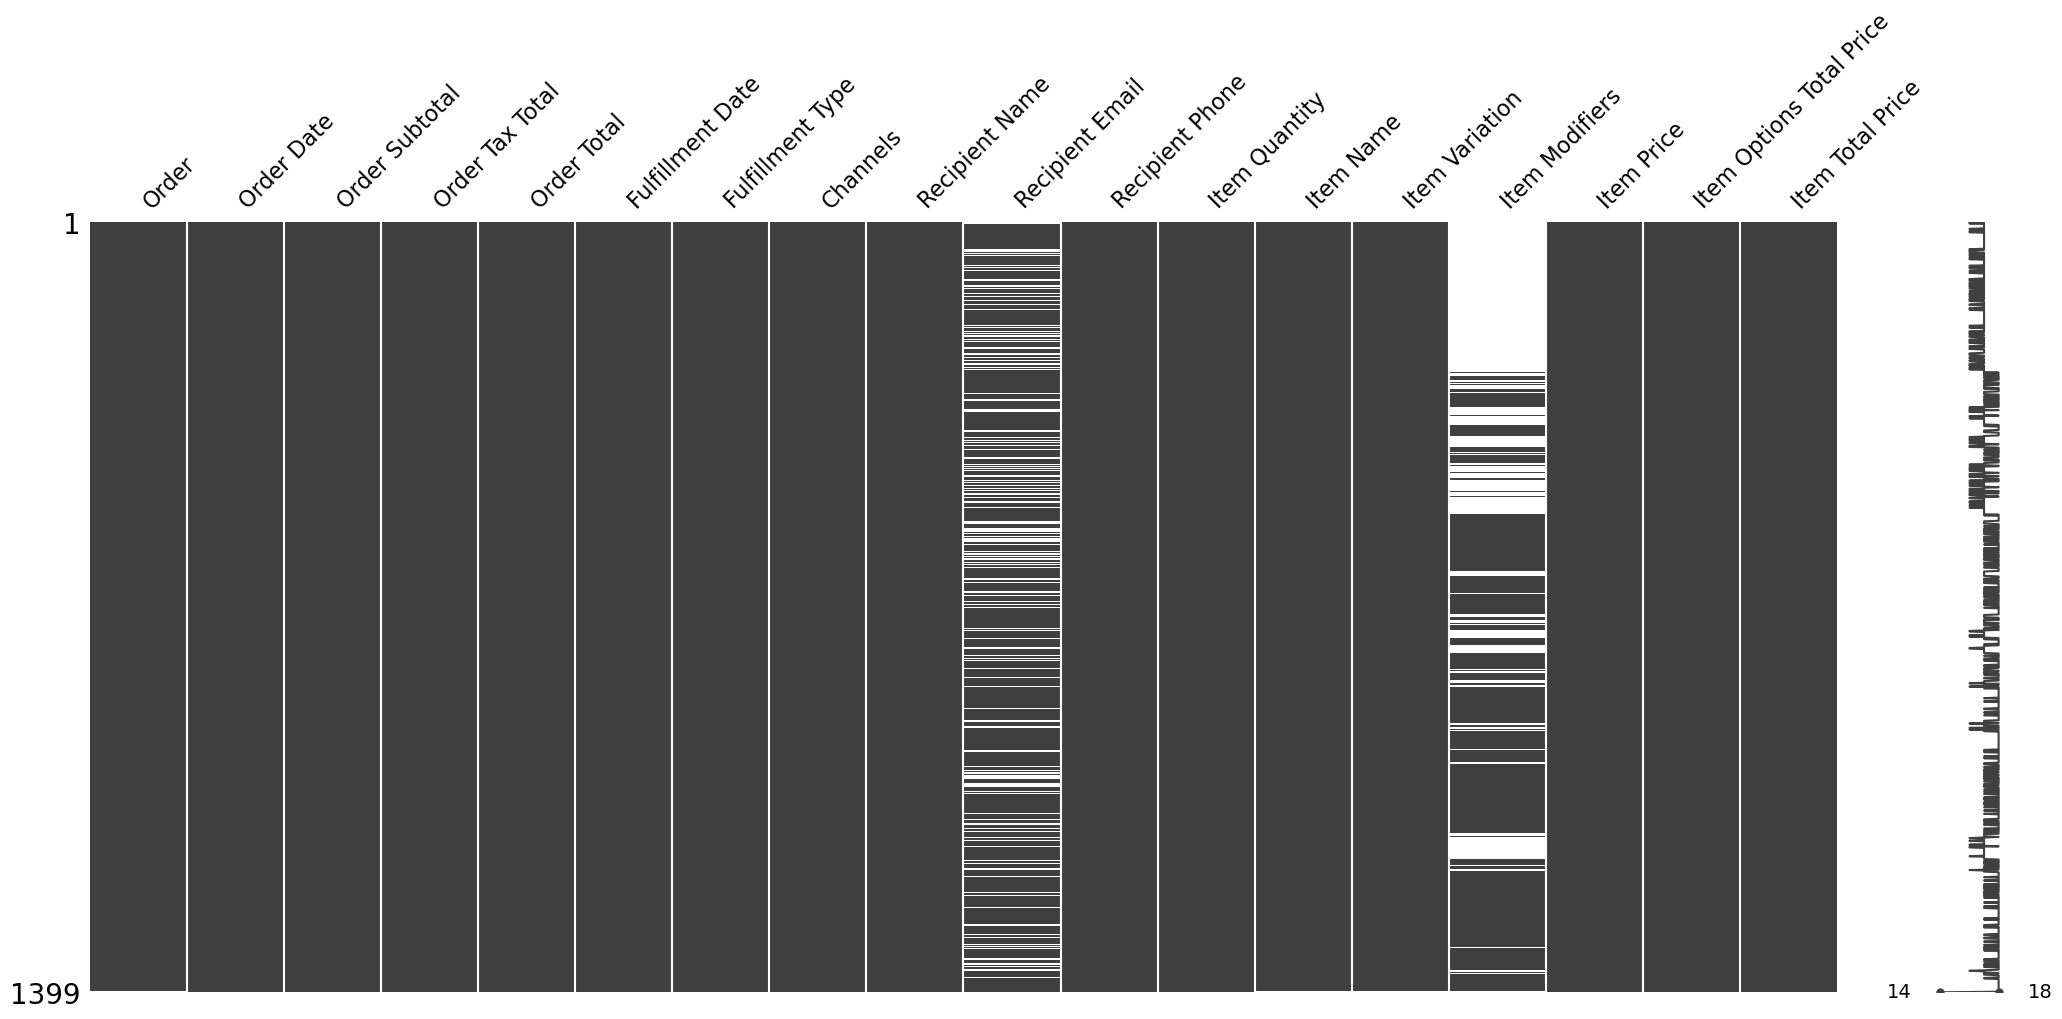

In [12]:
sorted_item_options = orders_processed_df.sort_values(by='Item Options Total Price')
msno.matrix(sorted_item_options)

plt.show()

In [ ]:
orders_processed_df[orders_processed_df['Item Price'] == max(orders_processed_df['Item Price'])]

# Items

In [3]:
items_df = pd.read_csv(data_path + 'items.csv')
items_df.head()

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Unit,Count,Itemization Type,Fulfillment Note,Token
0,2023-12-31,17:48:40,Pacific Time (US & Canada),Mains,BELLY SLIDERS (Voided),1.0,6 sliders,NaN,NaN,$0.00,...,Belly Rubb,For Here,NaN,NaN,NaN,ea,1,Physical Good,NaN,9614A912-0D13-4E3A-85F5-E7115915F515
1,2023-12-31,17:48:40,Pacific Time (US & Canada),Mains,BELLY SLIDERS (Voided),1.0,4 sliders,NaN,NaN,$0.00,...,Belly Rubb,For Here,NaN,NaN,NaN,ea,1,Physical Good,NaN,066F4B7E-69FB-4554-88DA-99ECE8BEEB6A
2,2023-12-31,17:48:40,Pacific Time (US & Canada),Mains,GET YOUR BABY BACK! (Voided),2.0,Full Rack,NaN,NaN,$0.00,...,Belly Rubb,For Here,NaN,NaN,NaN,ea,2,Physical Good,NaN,4D4021CE-9753-4704-9A59-EC94859819B3
3,2023-12-31,17:48:40,Pacific Time (US & Canada),Sides,MAC&CHEESE (Voided),1.0,Full,NaN,NaN,$0.00,...,Belly Rubb,For Here,NaN,NaN,NaN,ea,1,Physical Good,NaN,UFAF57JBKMKJN6SZNS2MCH4M
4,2023-12-31,17:42:54,Pacific Time (US & Canada),Mains,BELLY SLIDERS,1.0,6 sliders,NaN,NaN,$22.15,...,Belly Rubb,For Here,Q170DHBMPCY9K1ZZ49P049BCER,Narek Ekmekjyan,NaN,ea,1,Physical Good,NaN,9614A912-0D13-4E3A-85F5-E7115915F515


In [14]:
orders_df = pd.read_csv(data_path + 'orders.csv')
orders_df.head()

,Order,Order Date,Currency,Order Subtotal,Order Shipping Price,Order Tax Total,Order Total,Order Refunded Amount,Fulfillment Date,Fulfillment Type,...,Recipient Region,Recipient Country,Item Quantity,Item Name,Item SKU,Item Variation,Item Modifiers,Item Price,Item Options Total Price,Item Total Price
0,Uber Eats Delivery 8F819,2024/12/18,USD,37.90,NaN,3.46,41.36,NaN,"12/18/2024, 1:58 PM",Pickup,...,NaN,NaN,1,CRISPY CHICKEN SANDWICH,NaN,Regular,NaN,16.46,16.46,18.02
1,Uber Eats Delivery 8F819,2024/12/18,USD,37.90,NaN,3.46,41.36,NaN,"12/18/2024, 1:58 PM",Pickup,...,NaN,NaN,1,LOADED FRIES,NaN,Regular,"1 x Signature BBQ Sauce Drizzle, 1 x Salt and ...",11.99,12.74,13.95
2,Uber Eats Delivery 8F819,2024/12/18,USD,37.90,NaN,3.46,41.36,NaN,"12/18/2024, 1:58 PM",Pickup,...,NaN,NaN,1,CREAMY BLUE CHEESE DIP,NaN,Regular,NaN,1.45,1.45,1.45
3,Uber Eats Delivery 8F819,2024/12/18,USD,37.90,NaN,3.46,41.36,NaN,"12/18/2024, 1:58 PM",Pickup,...,NaN,NaN,1,ARTISAN MAC AND CHEESE,NaN,Side,NaN,7.25,7.25,7.94
4,Uber Eats Delivery 7751A,2024/12/17,USD,113.09,NaN,10.74,123.83,NaN,"12/17/2024, 7:56 PM",Pickup,...,NaN,NaN,3,BEEF SHORT RIB,NaN,Regular,NaN,33.95,33.95,111.52


In [11]:
items_df['Customer Name'].value_counts()

Customer Name
Narek Ekmekjyan       8
Arus Keshishyan       4
Alissa Khachmanyan    4
Michael Keshishyan    3
Emily Samvalian       3
Name: count, dtype: int64

In [10]:
item_sales_df = pd.read_csv(data_path + 'item-sales-summary.csv')
item_sales_df.head()

,Item Name,Item Variation,SKU,Category,Items Sold,Gross Sales,Items Refunded,Refunds,Discounts & Comps,Net Sales,Tax,Unit,Units Sold,Units Refunded
0,BELLY SLIDERS,2 sliders,NaN,Uncategorized,1,$9.98,0,$0.00,$0.00,$9.98,$0.95,ea,1,0
1,BBQ dipping sauce,Regular,NaN,Condiments,3,$2.55,0,$0.00,$0.00,$2.55,$0.00,ea,3,0
2,SIGNATURE BBQ SAUCE,Regular,NaN,Condiments,2,$1.70,0,$0.00,$0.00,$1.70,$0.16,ea,2,0
3,BELLY SLIDERS,4 sliders,NaN,Mains,2,$30.84,0,$0.00,$0.00,$30.84,$2.69,ea,2,0
4,BELLY SLIDERS,6 sliders,NaN,Mains,1,$22.15,0,$0.00,$0.00,$22.15,$2.10,ea,1,0


In [4]:
customers_df = pd.read_csv(data_path + 'customer-directory.csv')
customers_df.head()

,Reference ID,First Name,Last Name,Email Address,Phone Number,Nickname,Company Name,Street Address 1,Street Address 2,City,...,Birthday,Memo,Square Customer ID,Creation Source,First Visit,Last Visit,Transaction Count,Total Spend,Email Subscription Status,Instant Profile
0,NaN,Ahlennah,Belton,eowyn797@gmail.com,'+18056996797,NaN,NaN,260 West Elmwood Avenue,Apt K,Burbank,...,NaN,NaN,RN17897VKN317B63F7WDRD0YFC,Merge,2024-04-24,2024-04-24,1,$56.69,unsubscribed,No
1,NaN,Alan L,Kaplan,manowa72@gmail.com,'+18186323824,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,J4ZV8PCYETVR99SG3380RJ5HKG,Instant Profile (via Payment),2024-11-16,2024-11-16,1,$28.97,unknown,Yes
2,NaN,Alejandra,Mejia,aledrm84@gmail.com,'+13235121733,NaN,NaN,5633 Colfax Avenue,Leasing office,Los Angeles,...,NaN,NaN,BRET0KG4Q127HFWN9MP5HQR820,Merge,2024-05-31,2024-05-31,1,$30.98,unknown,No
3,NaN,Alex,NaN,NaN,'+16266164211,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MEKXVSXHDBBCKZBQ9CX8MB26ZW,Directory,2024-03-30,2024-03-30,1,NaN,NaN,No
4,NaN,Alexander,Diaz,alex.anthony.diaz@gmail.com,'+16266164211,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,JCJ1X244D95FZ8JYTX0VZEKCH8,Merge,2024-03-15,2024-09-17,14,$448.89,unknown,No
